# Connect to Smart Microscope Proxy

In [1]:
%%time
# %matplotlib widget
%matplotlib ipympl

import matplotlib.pylab as plt
import numpy as np

import Pyro5.api
import io
import time

CPU times: user 1.32 s, sys: 1.58 s, total: 2.9 s
Wall time: 372 ms


In [2]:
%%time
uri = "PYRO:tem.server@10.46.217.241:9093"
tem_server = Pyro5.api.Proxy(uri)

CPU times: user 45 µs, sys: 26 µs, total: 71 µs
Wall time: 71.8 µs


In [ ]:
%%time
#Activate camera
tem_server.activate_device('flu_camera'), tem_server.get_detectors()

In [24]:
tem_server.correct_to_2nd_order()

AttributeError: remote object 'PYRO:tem.server@10.46.217.241:9093' has no exposed attribute or method 'correct_to_2nd_order'

In [4]:
column_valve = tem_server.check_status('column valve') 
vacuum_status = tem_server.check_status('vacuum')
print(f' Vacuum: {vacuum_status}\n Column valve: {column_valve}')

 Vacuum: Ready
 Column valve: Closed


In [5]:

tem_server.set_stage({'y': -4e-6})
tem_server.get_stage()

[-1.4584499999998827e-07,
 2.999400000008383e-08,
 -8.760000000028953e-09,
 -3.1360000000182605e-06,
 0]

In [41]:
image, _, _ = tem_server.acquire_image('flu_camera')
plt.figure()
plt.imshow(np.log(image))
plt.colorbar()

AttributeError: 'tuple' object has no attribute 'shape'

C:\Users\gduscher\AppData\Local\Temp\ipykernel_24140\2449339142.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(image[0]))


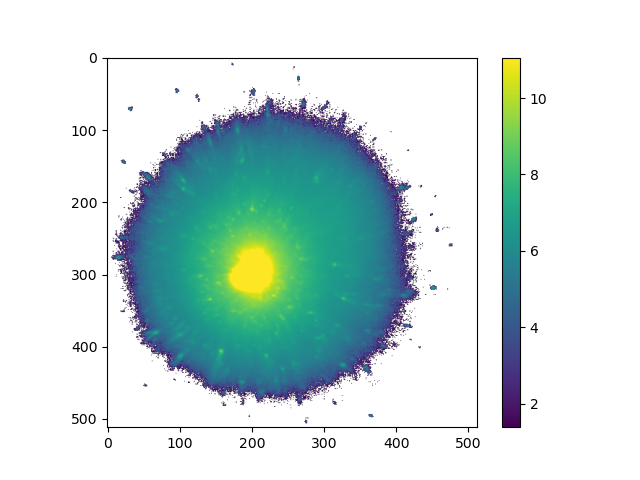